In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('training_titanic_x_y_train.csv')
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [3]:
df.shape

(668, 11)

In [4]:
df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Name      668 non-null    object 
 2   Sex       668 non-null    object 
 3   Age       536 non-null    float64
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Ticket    668 non-null    object 
 7   Fare      668 non-null    float64
 8   Cabin     154 non-null    object 
 9   Embarked  667 non-null    object 
 10  Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 57.5+ KB


In [6]:
df['Embarked'].value_counts()

S    484
C    133
Q     50
Name: Embarked, dtype: int64

In [7]:
df['Pclass'].value_counts()

3    359
1    161
2    148
Name: Pclass, dtype: int64

In [8]:
df['SibSp'].value_counts()

0    447
1    167
2     20
4     15
3     12
8      5
5      2
Name: SibSp, dtype: int64

In [9]:
df['Parch'].value_counts()

0    502
1     92
2     59
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
df['Sex'] = np.where(df['Sex']=='male',0,1)
df['Embarked'].fillna('S',inplace=True)
df['Embarked'].replace({'S':1,'C':2,'Q':3},inplace=True)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",1,29.0,1,0,228414,26.000,NaN,1,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",0,NaN,0,0,A/5 2466,8.050,NaN,1,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",0,39.0,0,0,250655,26.000,NaN,1,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.075,NaN,1,0
4,3,"Sutehall, Mr. Henry Jr",0,25.0,0,0,SOTON/OQ 392076,7.050,NaN,1,0


In [11]:
df_train = df.drop(['Name','Ticket','Cabin'],axis=1)
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1,29.0,1,0,26.000,1,1
1,3,0,NaN,0,0,8.050,1,0
2,2,0,39.0,0,0,26.000,1,0
3,3,1,29.0,0,4,21.075,1,0
4,3,0,25.0,0,0,7.050,1,0


In [12]:
for i in ['Pclass','Sex','Embarked']:
    df_train[i] = df_train[i].astype('category')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    668 non-null    category
 1   Sex       668 non-null    category
 2   Age       536 non-null    float64 
 3   SibSp     668 non-null    int64   
 4   Parch     668 non-null    int64   
 5   Fare      668 non-null    float64 
 6   Embarked  668 non-null    category
 7   Survived  668 non-null    int64   
dtypes: category(3), float64(2), int64(3)
memory usage: 28.6 KB


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

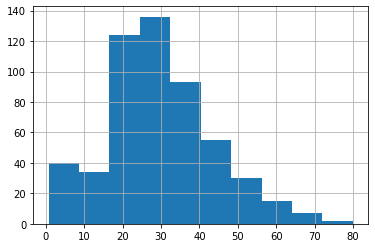

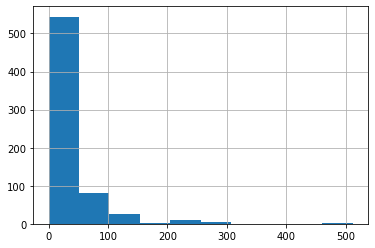

In [14]:
for col in ['Age','Fare']:
    df[col].hist()
    plt.show()

In [15]:
df_train_dummy = pd.get_dummies(df_train[['Pclass','Embarked']],drop_first=True)
df_train = pd.concat([df_train[['Sex','Age','SibSp','Parch','Fare','Survived']],df_train_dummy],axis=1)
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_train.head()

,Sex,Age,SibSp,Parch,Fare,Survived,Pclass_2,Pclass_3,Embarked_2,Embarked_3
0,1,29.00000,1,0,26.000,1,1,0,0,0
1,0,29.70056,0,0,8.050,0,0,1,0,0
2,0,39.00000,0,0,26.000,0,1,0,0,0
3,1,29.00000,0,4,21.075,0,0,1,0,0
4,0,25.00000,0,0,7.050,0,0,1,0,0


In [16]:
df_train.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Pclass_2',
       'Pclass_3', 'Embarked_2', 'Embarked_3'],
      dtype='object')

In [17]:
Y = df_train['Survived']
X = df_train.drop(['Survived'],axis=1)
print('X shape: ',X.shape)
print('Y shape: ',Y.shape)

X shape:  (668, 9)
Y shape:  (668,)


In [18]:
X.isnull().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Embarked_2    0
Embarked_3    0
dtype: int64

In [19]:
from sklearn.model_selection import KFold , cross_val_score
K_fold = KFold(n_splits=10, shuffle=True,random_state=1234)

In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
pred_lr = cross_val_score(clf,X,Y,cv=K_fold,n_jobs=-1,scoring='accuracy')
print(pred_lr)
print("\nAvg. Accuracy : ",round(np.mean(pred_lr)*100,2))

[0.71641791 0.74626866 0.82089552 0.82089552 0.7761194  0.82089552
 0.8358209  0.8358209  0.74242424 0.78787879]

Avg. Accuracy :  79.03


In [21]:
clf.fit(X,Y)

/Users/himanshubag/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
test_df = pd.read_csv('test_titanic_x_test.csv')
print(test_df.isnull().sum())
test_df.head()

Pclass        0
Name          0
Sex           0
Age          45
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       173
Embarked      1
dtype: int64


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


In [23]:
test_df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,male,8.0,1,1,36.7500,S
1,1,female,49.0,0,0,25.9292,S
2,3,male,NaN,0,0,7.7375,Q
3,2,female,24.0,2,1,27.0000,S
4,1,male,36.0,0,0,26.2875,S


In [24]:
test_df['Sex'] = np.where(test_df['Sex']=='male',0,1)
test_df['Embarked'].fillna('S',inplace=True)
test_df['Embarked'].replace({'S':1,'C':2,'Q':3},inplace=True)
for i in ['Pclass','Sex','Embarked']:
    test_df[i] = test_df[i].astype('category')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    223 non-null    category
 1   Sex       223 non-null    category
 2   Age       178 non-null    float64 
 3   SibSp     223 non-null    int64   
 4   Parch     223 non-null    int64   
 5   Fare      223 non-null    float64 
 6   Embarked  223 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 8.1 KB


In [25]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,0,8.0,1,1,36.7500,1
1,1,1,49.0,0,0,25.9292,1
2,3,0,NaN,0,0,7.7375,3
3,2,1,24.0,2,1,27.0000,1
4,1,0,36.0,0,0,26.2875,1


In [27]:
test_df_dummy = pd.get_dummies(test_df[['Pclass','Embarked']],drop_first=True)
test_df = pd.concat([test_df[['Sex','Age','SibSp','Parch','Fare']],test_df_dummy],axis=1)
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)
test_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_2,Embarked_3
0,0,8.000000,1,1,36.7500,1,0,0,0
1,1,49.000000,0,0,25.9292,0,0,0,0
2,0,29.694775,0,0,7.7375,0,1,0,1
3,1,24.000000,2,1,27.0000,1,0,0,0
4,0,36.000000,0,0,26.2875,0,0,0,0


<AxesSubplot:>

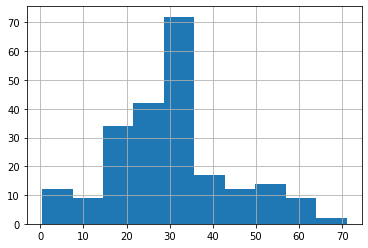

In [28]:
test_df['Age'].hist()

In [29]:
y_pred = clf.predict(test_df)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0])

In [30]:
np.savetxt('result_titanic_logistic_reg.csv',y_pred)